# Loading `gwent` SNR Outputs to Generate Comparison Waterfall Plots

Here we present a tutorial on how to use `gwent` output from `Get_SNR_Matrix` to simultaneously plot Mass vs. Redshift SNRs for the instrument models currently implemented (LISA, PTAs, aLIGO, and Einstein Telescope) with the signal being an coalescing Binary Black Holes.

First, we import the necessary packages.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import astropy.units as u
from astropy.cosmology import z_at_value
from astropy.cosmology import WMAP9 as cosmo

import gwent

Setting matplotlib preferences

In [2]:
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['figure.figsize'] = [5,3]
mpl.rcParams['text.usetex'] = True
mpl.rc('font',**{'family':'serif','serif':['Times New Roman']})

We need to get the file directories to load in the SNRs.

In [3]:
load_directory = gwent.__path__[0] + '/LoadFiles/InstrumentFiles/'

## Loading SNR Data Files

#### LISA Proposal 1

SNR values from the ESA L3 proposal run.

In [4]:
lisa_filedirectory = load_directory + 'LISA_ESA/SNRFiles/'
lisa_SNR_filename = 'LISA_ESA_SNR_Matrix.dat'
lisa_Samples_filename = 'LISA_ESA_Samples.dat'
lisa_SNR_filelocation = lisa_filedirectory+lisa_SNR_filename
lisa_Samples_filelocation = lisa_filedirectory+lisa_Samples_filename

Load SNR from file

In [5]:
lisa_SNR = np.loadtxt(lisa_SNR_filelocation)

First column is x-axis variable, second is y-axis variable
z and M sample space corresponding to SNR height

In [6]:
lisa_Samples = np.loadtxt(lisa_Samples_filelocation)

Take log of variables and SNR for plotting

In [7]:
lisa_logSamples = np.log10(lisa_Samples)
lisa_logSNR = np.log10(lisa_SNR)

#### Einstein Telescope

SNR values from the Einstein Telescope proposal run.

In [8]:
et_filedirectory = load_directory + 'EinsteinTelescope/SNRFiles/'
et_SNR_filename = 'ET_SNR_Matrix.dat'
et_Samples_filename = 'ET_Samples.dat'
et_SNR_filelocation = et_filedirectory+et_SNR_filename
et_Samples_filelocation = et_filedirectory+et_Samples_filename

et_SNR = np.loadtxt(et_SNR_filelocation)
et_Samples = np.loadtxt(et_Samples_filelocation)

et_logSamples = np.log10(et_Samples)
et_logSNR = np.log10(et_SNR)

#### aLIGO

SNR values from the Advanced LIGO run.

In [9]:
aLIGO_filedirectory = load_directory + 'aLIGO/SNRFiles/'
aLIGO_SNR_filename = 'aLIGO_SNR_Matrix.dat'
aLIGO_Samples_filename = 'aLIGO_Samples.dat'
aLIGO_SNR_filelocation = aLIGO_filedirectory+aLIGO_SNR_filename
aLIGO_Samples_filelocation = aLIGO_filedirectory+aLIGO_Samples_filename

aLIGO_SNR = np.loadtxt(aLIGO_SNR_filelocation)
aLIGO_Samples = np.loadtxt(aLIGO_Samples_filelocation)

aLIGO_logSNR = np.log10(aLIGO_SNR)
aLIGO_logSamples = np.log10(aLIGO_Samples)

#### NANOGrav

SNR values from the NANOGrav-esque run.

In [10]:
nanograv_filedirectory = load_directory + 'NANOGrav/SNRFiles/'
nanograv_SNR_filename = 'NANOGrav_SNR_Matrix.dat'
nanograv_Samples_filename = 'NANOGrav_Samples.dat'
nanograv_SNR_filelocation = nanograv_filedirectory+nanograv_SNR_filename
nanograv_Samples_filelocation = nanograv_filedirectory+nanograv_Samples_filename

nanograv_SNR = np.loadtxt(nanograv_SNR_filelocation)
nanograv_Samples = np.loadtxt(nanograv_Samples_filelocation)

nanograv_logSamples = np.log10(nanograv_Samples)
nanograv_logSNR = np.log10(nanograv_SNR)

#### SKA

SNR values from the SKA-esque run.

In [11]:
SKA_filedirectory = load_directory + 'SKA/SNRFiles/'
SKA_SNR_filename = 'SKA_SNR_Matrix.dat'
SKA_Samples_filename = 'SKA_Samples.dat'
SKA_SNR_filelocation = SKA_filedirectory+SKA_SNR_filename
SKA_Samples_filelocation = SKA_filedirectory+SKA_Samples_filename

SKA_SNR = np.loadtxt(SKA_SNR_filelocation)
SKA_Samples = np.loadtxt(SKA_Samples_filelocation)

SKA_logSamples = np.log10(SKA_Samples)
SKA_logSNR = np.log10(SKA_SNR)

## Make Waterfall Plots

Sets plotting parameters

In [12]:
contourcolorPresent = 'plasma'
transparencyPresent = 1.0
contourcolorFuture = 'plasma'
transparencyFuture = 0.6
axissize = 8
labelsize = 10
textsize = 10
textcolor1 = 'k'
textcolor2 = 'w'
linesize = 2

Selects contour levels to separate sections into

In [13]:
contLevels = np.array([5, 10, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7])
logLevels = np.log10(contLevels)

Set labels for x and y axes

In [14]:
Mlabel_min = 0
Mlabel_max = 11
zlabel_min = -2.0
zlabel_max = 3.0
zlabels = np.logspace(zlabel_min,zlabel_max,zlabel_max-zlabel_min+1)
Mlabels = np.logspace(Mlabel_min,Mlabel_max,Mlabel_max-Mlabel_min+1)

Set labels for lookback time on y-axis

In [15]:
ages1 = np.array([13.5,13,10,5,1])*u.Gyr 
ages2 = np.array([500,100,10,1])*u.Myr
ages2 = ages2.to('Gyr')
ages = np.hstack((ages1.value,ages2.value))
ages = ages*u.Gyr
ageticks = [z_at_value(cosmo.age,age) for age in ages]

Add Label positions and labels for different GW detectors

In [16]:
labelaLIGO_text = 'aLIGO\n(2016)'
labelaLIGO_xpos = 0.22
labelaLIGO_ypos = 0.125

labelnanograv_text = 'NANOGrav\n(2018)'
labelnanograv_xpos = 0.91
labelnanograv_ypos = 0.175

labelet_text = 'ET\n($\sim$2030s)'
labelet_xpos = 0.175
labelet_ypos = 0.6

labelLisa_text = 'LISA\n($\sim$2030s)'
labelLisa_xpos = 0.615
labelLisa_ypos = 0.1

labelIpta_text = 'IPTA\n($\sim$2030s)'
labelIpta_xpos = 0.675
labelIpta_ypos = 0.85

#### Plots of Entire GW Band

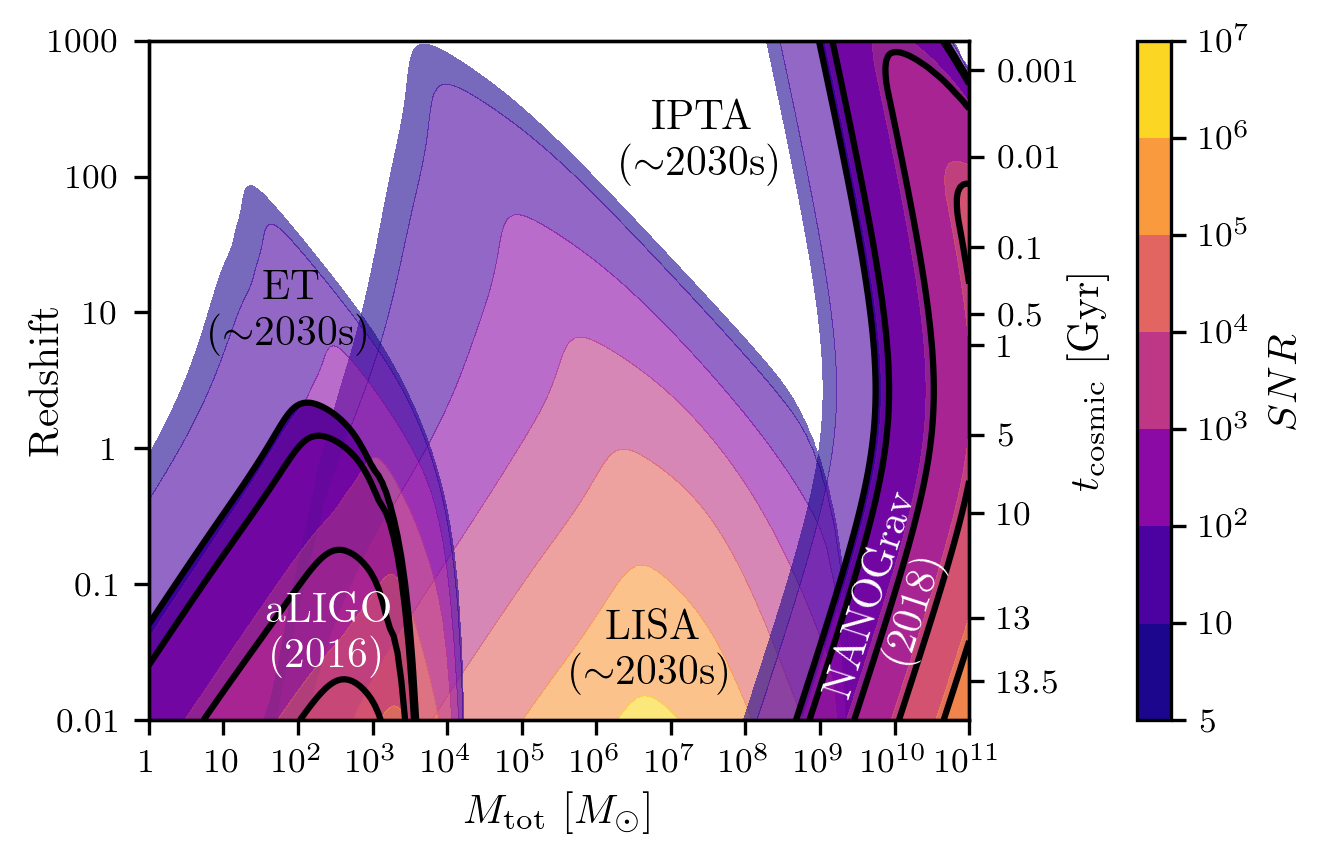

In [17]:
fig, ax1 = plt.subplots()

#Set other side y-axis for lookback time scalings
ax2 = ax1.twinx()

CS1 = ax1.contourf(nanograv_logSamples[0],nanograv_logSamples[1],nanograv_logSNR,logLevels,\
                   cmap = contourcolorPresent, alpha = transparencyPresent)

ax2.contour(nanograv_logSamples[0],nanograv_logSamples[1],nanograv_logSNR,logLevels,colors = 'k')

ax1.contourf(aLIGO_logSamples[0],aLIGO_logSamples[1],aLIGO_logSNR,logLevels,\
             cmap = contourcolorPresent, alpha = transparencyPresent)

ax1.contour(aLIGO_logSamples[0],aLIGO_logSamples[1],aLIGO_logSNR,logLevels,colors = 'k')

ax1.contourf(lisa_logSamples[0],lisa_logSamples[1],lisa_logSNR,logLevels,\
             cmap=contourcolorFuture, alpha = transparencyFuture)

ax1.contourf(et_logSamples[0],et_logSamples[1],et_logSNR,logLevels,\
             cmap = contourcolorFuture, alpha = transparencyFuture)

ax1.contourf(SKA_logSamples[0],SKA_logSamples[1],SKA_logSNR,logLevels,\
             cmap = contourcolorFuture, alpha = transparencyFuture)


#Set axes limits 
ax1.set_xlim(et_logSamples[0][0],11)
ax1.set_ylim(SKA_logSamples[1][0],SKA_logSamples[1][-1])


#Set ticks and labels
ax1.set_yticks(np.log10(zlabels))
ax1.set_xticks(np.log10(Mlabels))
ax1.set_xticklabels([r'$10^{%i}$' %y if int(y) > 1 else r'$%i$' %(10**y) for y in np.log10(Mlabels)],\
    fontsize = axissize)
ax1.set_yticklabels([x if int(x) < 1 else int(x) for x in zlabels],\
    fontsize = axissize)

ax1.set_xlabel(r'$M_{\rm tot}$ $[M_{\odot}]$',fontsize = labelsize)
ax1.set_ylabel(r'${\rm Redshift}$',fontsize = labelsize)
ax1.yaxis.set_label_coords(-.1,.5)

ax2.set_yticks(np.log10(ageticks))
ax2.set_yticklabels(['{:g}'.format(age) for age in ages.value],fontsize = axissize)
ax2.set_ylabel(r'$t_{\rm cosmic}$ [Gyr]',fontsize=labelsize)
ax2.yaxis.set_label_coords(1.125,.5)

#Label different GW detectors
plt.text(labelaLIGO_xpos,labelaLIGO_ypos,labelaLIGO_text,fontsize = textsize, \
         horizontalalignment='center',verticalalignment='center', color = textcolor2,transform = ax1.transAxes)

plt.text(labelnanograv_xpos,labelnanograv_ypos,labelnanograv_text,fontsize = textsize,\
         horizontalalignment='center',verticalalignment='center', color = textcolor2,transform = ax1.transAxes,\
        rotation=72)

plt.text(labelet_xpos,labelet_ypos,labelet_text,fontsize = textsize,\
         horizontalalignment='center',verticalalignment='center', color = textcolor1,transform = ax1.transAxes)

plt.text(labelLisa_xpos,labelLisa_ypos,labelLisa_text,fontsize = textsize,\
         horizontalalignment='center',verticalalignment='center', color = textcolor1,transform = ax1.transAxes)

plt.text(labelIpta_xpos,labelIpta_ypos,labelIpta_text,fontsize = textsize,\
         horizontalalignment='center',verticalalignment='center', color = textcolor1,transform = ax1.transAxes)

#Make colorbar
cbar = fig.colorbar(CS1,ax=(ax1,ax2),pad=0.01)
cbar.set_label(r'$SNR$',fontsize = labelsize)
cbar.ax.tick_params(labelsize = axissize)
cbar.ax.set_yticklabels([r'$10^{%i}$' %x if int(x) > 1 else r'$%i$' %(10**x) for x in logLevels])
plt.show()